# DAT341 Programming assignment 3 part 3: Stance classification
## Yahui Wu(15hrs)


## Tianshuo Xiao(15hrs)

## Group 21

## 1. Data processing

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('./a3_train_final.tsv', sep='\t',header=None, names=['label', 'comment'])
label_list = list(data['label'])
for i in range(len(label_list)):
    label_list[i] = label_list[i].split('/')

label = []
label_value = [0,1,-1]
for i in range(len(label_list)):
    label_dic = {}
    for j in label_value:
        label_dic[str(j)] = label_list[i].count(str(j))
    
    label_sort = sorted(label_dic.items(), key  = lambda x:x[1], reverse = True)
    if label_sort[0][1] > label_sort[1][1]:
        label_list[i] = [label_sort[0][0]]
    else:
        label_list[i] = ['-1']
label_list = [i for item in label_list for i in item]
data['label'] = label_list
data = data[~data['label'].isin(['-1'])]
train_data = data
train_data

label                                            comment
0         1   I'll only consume if I know what's inside it....
2         0   NATURAL IMMUNITY  protected us since evolutio...
4         1   The bigest sideffect of vaccines is fewer dea...
6         1   Vaccine takes more than a year to develop.  T...
7         0   YES IM A TRUCKER FROM USA AND I WONT GET VACC...
...     ...                                                ...
37880     0  🤣 keep your 💩 I already know 3 people who have...
37881     0  🤣🤣🤣 "JUST BECAUSE IT'S SAFE, DOESN'T MEAN IT D...
37882     0  🤣🤣🤣 I took the Vaccine because of work. If I d...
37883     0  🤨there's people already having severe side eff...
37884     1  🥦I ❤my covid vaccines and I'm so excited for m...

[32452 rows x 2 columns]

In [2]:
test_data = pd.read_csv('./a3_test.tsv', sep='\t',header=None, names=['label', 'comment'],dtype='O')

## Vectorizer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
Xtrain = train_data['comment']
Ytrain = train_data['label']
Xtest = test_data['comment']
Ytest = test_data['label']

In [5]:
tf = TfidfVectorizer() 
Xtrain_tf = tf.fit_transform(Xtrain)
Xtest_tf = tf.transform(Xtest)


In [6]:
feature_name = list(tf.get_feature_names_out())


## Find better models

In [7]:
from sklearn.linear_model import Perceptron
cross_val_score(Perceptron(), Xtrain_tf, Ytrain, cv=10).mean()

0.7706448899534523

In [8]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
score_bnb = cross_val_score(bnb, Xtrain_tf, Ytrain).mean()
score_bnb

0.7956055023679818

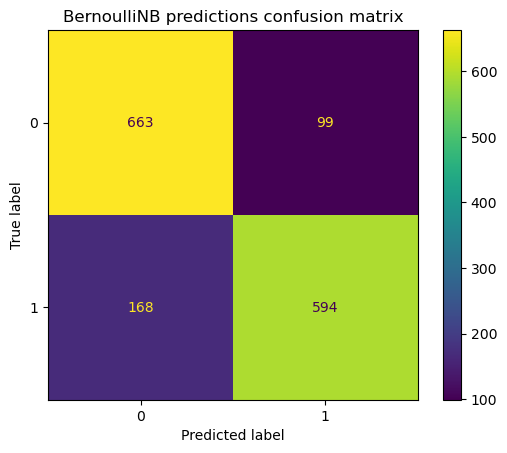

In [9]:
bnb.fit(Xtrain_tf, Ytrain)
Ypre_bnb = bnb.predict(Xtest_tf)
ConfusionMatrixDisplay(confusion_matrix(Ytest, Ypre_bnb)).plot()
plt.title("BernoulliNB predictions confusion matrix")
plt.show()

In [10]:
tn_bnb, fp_bnb, fn_bnb, tp_bnb = confusion_matrix(Ytest,Ypre_bnb).ravel()
tpRate_bnb = tn_bnb/(fp_bnb+tn_bnb)
tnRate_bnb = tp_bnb/(fn_bnb+tp_bnb)

print ("True positive rate: " + str(tpRate_bnb))
print ("True negative rate: " + str(tnRate_bnb))

True positive rate: 0.8700787401574803
True negative rate: 0.7795275590551181


In [11]:
from sklearn.naive_bayes import MultinomialNB
mult = MultinomialNB()
score_mult = cross_val_score(mult, Xtrain_tf, Ytrain).mean()
score_mult

0.8068839277045685

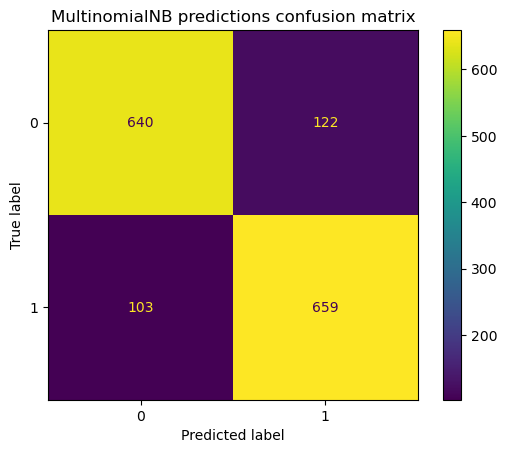

In [12]:
mult.fit(Xtrain_tf, Ytrain)
Ypre_mult = mult.predict(Xtest_tf)
ConfusionMatrixDisplay(confusion_matrix(Ytest, Ypre_mult)).plot()
plt.title("MultinomialNB predictions confusion matrix")
plt.show()

In [13]:
tn_mult, fp_mult, fn_mult, tp_mult = confusion_matrix(Ytest,Ypre_mult).ravel()
tpRate_mult = tn_mult/(fp_mult+tn_mult)
tnRate_mult = tp_mult/(fn_mult+tp_mult)
print ("True positive rate: " + str(tpRate_mult))
print ("True negative rate: " + str(tnRate_mult))

True positive rate: 0.8398950131233596
True negative rate: 0.8648293963254593


In [14]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
score_svc = cross_val_score(svc, Xtrain_tf, Ytrain).mean()
score_svc

0.815080940565092

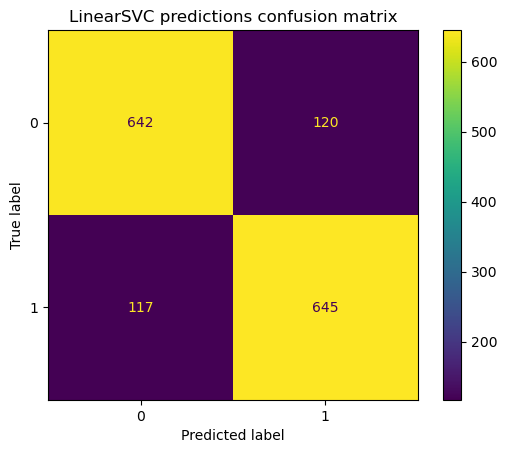

In [15]:
svc.fit(Xtrain_tf, Ytrain)
Ypre_svc = svc.predict(Xtest_tf)
ConfusionMatrixDisplay(confusion_matrix(Ytest, Ypre_svc)).plot()
plt.title("LinearSVC predictions confusion matrix")
plt.show()

In [16]:
tn_svc, fp_svc, fn_svc, tp_svc = confusion_matrix(Ytest,Ypre_svc).ravel()
tpRate_svc = tn_svc/(fp_svc+tn_svc)
tnRate_svc = tp_svc/(fn_svc+tp_svc)
f1_score_svc_old = 2*tp_svc/(2*tp_svc + fn_svc + fp_svc )
print ("True positive rate: " + str(tpRate_svc))
print ("True negative rate: " + str(tnRate_svc))
f1_score_svc_old

True positive rate: 0.84251968503937
True negative rate: 0.8464566929133859


0.8447937131630648

In [17]:
accuracy_score(Ytest, Ypre_svc)

0.844488188976378

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
score_log = cross_val_score(log, Xtrain_tf, Ytrain).mean()
score_log

0.8125847926452152

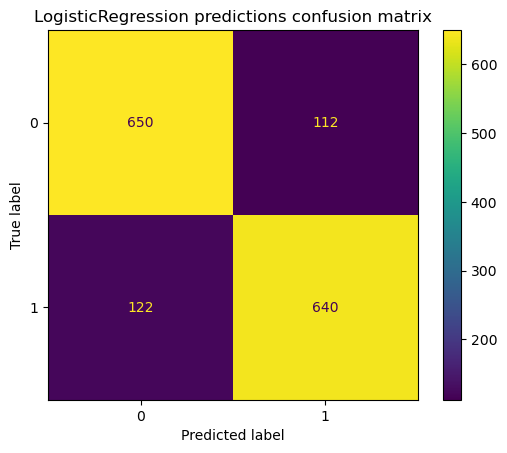

In [19]:
log.fit(Xtrain_tf, Ytrain)
Ypre_log = log.predict(Xtest_tf)
ConfusionMatrixDisplay(confusion_matrix(Ytest, Ypre_log)).plot()
plt.title("LogisticRegression predictions confusion matrix")
plt.show()

In [20]:
tn_log, fp_log, fn_log, tp_log = confusion_matrix(Ytest,Ypre_log).ravel()
tpRate_log = tn_log/(fp_log+tn_log)
tnRate_log = tp_log/(fn_log+tp_log)
print ("True positive rate: " + str(tpRate_log))
print ("True negative rate: " + str(tnRate_log))

True positive rate: 0.8530183727034121
True negative rate: 0.8398950131233596


In [ ]:
from sklearn.neural_network import MLPClassifier

# Try different sizes of hidden layer(30-70) and select the size where it reaches maximum score
clf_mlpc = MLPClassifier(random_state=0, hidden_layer_sizes=(100,40))

score = cross_val_score(clf_mlpc, Xtrain_tf, Ytrain)
print(f" MLPClassifier aggregate score: {score.mean()}")

## Hyperparameter tuning

### LinearSVC

In [21]:
from sklearn.model_selection import GridSearchCV
clf_svc = LinearSVC()
param_grid_svc = {'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
gridsearch_svc = GridSearchCV(clf_svc, param_grid_svc)
gridsearch_svc.fit(Xtrain_tf, Ytrain);
gridsearch_svc.best_params_

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_bas

{'C': 1, 'penalty': 'l2'}

In [22]:
param_grid_svc_new = {'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3], 'penalty': ['l1', 'l2']}
gridsearch_svc_new = GridSearchCV(clf_svc, param_grid_svc_new)
gridsearch_svc_new.fit(Xtrain_tf, Ytrain);
gridsearch_svc_new.best_params_

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "D:\anaconda\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "D:\anaconda\li

{'C': 0.5, 'penalty': 'l2'}

In [23]:
param_grid_svc_new = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], 'penalty': ['l1', 'l2']}
gridsearch_svc_new = GridSearchCV(clf_svc, param_grid_svc_new)
gridsearch_svc_new.fit(Xtrain_tf, Ytrain);
gridsearch_svc_new.best_params_

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "D:\anaconda\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "D:\anaconda\li

{'C': 0.4, 'penalty': 'l2'}

In [24]:
best_C_lin = gridsearch_svc.best_params_['C']
best_penalty_lin = gridsearch_svc.best_params_['penalty']
clf_best_svc =  LinearSVC(C=0.4, penalty=best_penalty_lin)
clf_best_svc.fit(Xtrain_tf, Ytrain)
Ypre_svc = clf_best_svc.predict(Xtest_tf)
accuracy_score(Ytest, clf_best_svc.predict(Xtest_tf))

0.8536745406824147

In [25]:
cross_val_score(clf_best_svc, Xtrain_tf, Ytrain).mean()

0.8181006865260161

In [26]:
tn_svc_new, fp_svc_new, fn_svc_new, tp_svc_new = confusion_matrix(Ytest,clf_best_svc.predict(Xtest_tf)).ravel()
tpRate_svc_new = tn_svc_new/(fp_svc_new+tn_svc_new)
tnRate_svc_new = tp_svc_new/(fn_svc_new+tp_svc_new)

print ("True positive rate: " + str(tpRate_svc))
print ("True negative rate: " + str(tnRate_svc))
f1_score_svc_new = 2*tp_svc_new/(2*tp_svc_new + fn_svc_new + fp_svc_new )
print ("F1 score: " + str(f1_score_svc_new))

True positive rate: 0.84251968503937
True negative rate: 0.8464566929133859
F1 score: 0.85261070720423


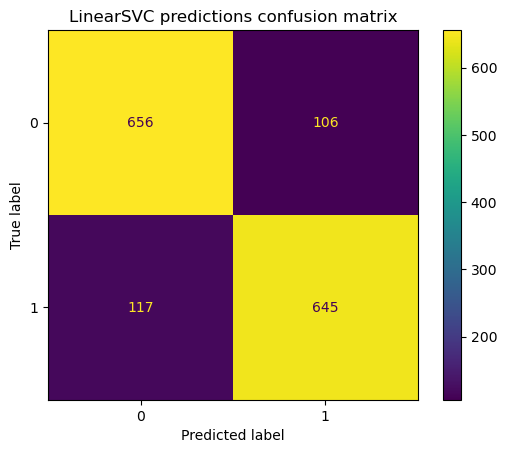

In [27]:
ConfusionMatrixDisplay(confusion_matrix(Ytest, Ypre_svc)).plot()
plt.title("LinearSVC predictions confusion matrix")
plt.show()

AUC: 0.928


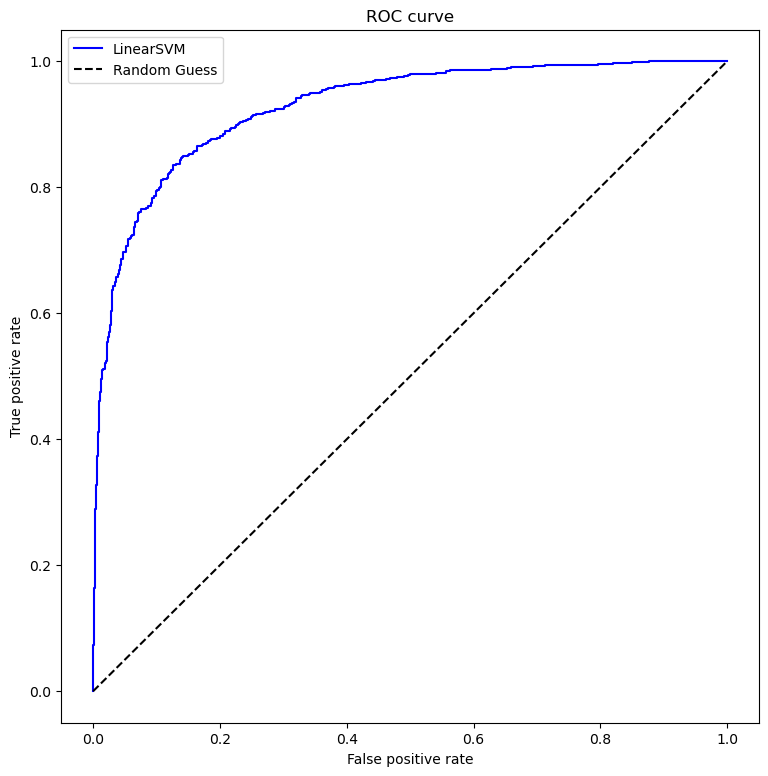

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
decision_scores = clf_best_svc.decision_function(Xtest_tf)
Ytest_int = Ytest.map({'1': 1, '0': 0}).astype(int)
fpr, tpr, thres = roc_curve(Ytest_int, decision_scores)
print("AUC: {:.3f}".format(roc_auc_score(Ytest, decision_scores)))

# roc curve
plt.figure(figsize = (9, 9))
plt.plot(fpr, tpr, "b", label = "LinearSVM")
plt.plot([0,1],[0,1], "k--", label = "Random Guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc = "best")
plt.title("ROC curve")
plt.show()

In [29]:
misclassified = (clf_best_svc.predict(Xtest_tf) != Ytest)
X_mis = Xtest[misclassified]
X_mis

1       I don't know what's in it. As if they know wha...
6       We take other risks so taking this one shouldn...
28          95% effective for a virus that kills at 0.5%.
31             A big thanks to Germany! Biontech FTW! :-)
35      A good friend is recovering after covid, havin...
                              ...                        
1499               vaccine development cycle is too short
1508    vaccines can resist the harm caused by the new...
1510    we lost our uncle to covid. he was such a lovi...
1518    “Anti-vaxers” are just more intelligent than t...
1521    “No vaccine has ever been proven effective.” T...
Name: comment, Length: 223, dtype: object

In [30]:
weight_feature = list(clf_best_svc.coef_[0])
dic_feature = dict(zip(feature_name,weight_feature))
sort_feature = sorted(dic_feature.items(), key = lambda x:x[1], reverse = True)
important_1 = sort_feature[0:10]
important_1

[('antivaxxers', 3.103677258436597),
 ('anti', 2.149357322941134),
 ('vaxxers', 1.8828238002977653),
 ('available', 1.8749748445550842),
 ('ventilator', 1.8704262290780747),
 ('getvaccinated', 1.8593773171845682),
 ('selfish', 1.844538078424743),
 ('response', 1.7924576683430475),
 ('antivaxers', 1.7576983335302447),
 ('understand', 1.7298099034683065)]

In [31]:
important_0 = sort_feature[-10:]
important_0 = sorted(important_0, key = lambda x:x[1], reverse = False)
important_0

[('poison', -2.5849543632275123),
 ('never', -2.3417301022054495),
 ('not', -2.3328081068001976),
 ('forced', -2.1682681764350016),
 ('experimental', -2.12830955268965),
 ('rushed', -2.032458986111399),
 ('liability', -1.9552895021081742),
 ('pressured', -1.9019829581798433),
 ('experiment', -1.875632559882347),
 ('force', -1.8505308802998812)]

### Features important

In [32]:
from collections import Counter
import re

In [33]:
def most_frequent_words(file_name, num):
    words = Counter(file_name.split()).most_common(num)
    print(words)

In [34]:
def clean_file2(textname):
    xxx = re.sub(r'[^\w]', ' ',textname)
    return xxx

In [35]:
comments = data.iloc[:,1]
comments = list(comments)
comments

[" I'll only consume if I know what's inside it.  Still him drinking monster which has taurine",
 ' NATURAL IMMUNITY  protected us since evolution. Do not exist anymore?',
 ' The bigest sideffect of vaccines is fewer dead children  That is savage',
 ' Vaccine takes more than a year to develop.  This is the mistake people are making. Its not 1976 anymore. Vaccines do not take years to make.',
 ' YES IM A TRUCKER FROM USA AND I WONT GET VACCINATED Can I get retweets and follows from patriots? IFB, on the way back up to Ottawa to lend support @truckers4fredom ',
 ' out of anger People say stupid things man is spot on. I got vaccine, im a 41 year olds old, had minor symptoms. Well Worth getting it, if it helps me get back to living normal life, Im all for it',
 "... it's been politicized in a way that has cost lives.. THAT is what should be investigated. THAT is what some people should be held accountable for!",
 '... vaccines are safe and effective. Why? Because WE SAID SO!',
 "90% of peo

In [36]:
comments_clean = clean_file2(str(comments))
comments_clean

'   I ll only consume if I know what s inside it   Still him drinking monster which has taurine     NATURAL IMMUNITY  protected us since evolution  Do not exist anymore      The bigest sideffect of vaccines is fewer dead children  That is savage     Vaccine takes more than a year to develop   This is the mistake people are making  Its not 1976 anymore  Vaccines do not take years to make      YES IM A TRUCKER FROM USA AND I WONT GET VACCINATED Can I get retweets and follows from patriots  IFB  on the way back up to Ottawa to lend support  truckers4fredom      out of anger People say stupid things man is spot on  I got vaccine  im a 41 year olds old  had minor symptoms  Well Worth getting it  if it helps me get back to living normal life  Im all for it        it s been politicized in a way that has cost lives   THAT is what should be investigated  THAT is what some people should be held accountable for         vaccines are safe and effective  Why  Because WE SAID SO     90  of people tha

In [37]:
comments_most = most_frequent_words(comments_clean, 200)
comments_most

[('the', 32332), ('I', 23318), ('to', 21597), ('and', 19096), ('a', 15241), ('vaccine', 13755), ('of', 13292), ('it', 11809), ('is', 10922), ('that', 8758), ('in', 8554), ('t', 8470), ('for', 8042), ('you', 8030), ('are', 7582), ('my', 6910), ('not', 6848), ('have', 6818), ('get', 6229), ('s', 6137), ('people', 5525), ('be', 5513), ('this', 5388), ('vaccines', 4571), ('with', 4481), ('they', 4353), ('vaccinated', 4260), ('will', 3820), ('all', 3747), ('m', 3729), ('so', 3616), ('from', 3584), ('The', 3520), ('on', 3467), ('was', 3389), ('can', 3328), ('we', 3223), ('as', 3213), ('but', 3196), ('take', 3184), ('had', 3142), ('who', 3022), ('don', 2926), ('your', 2889), ('me', 2860), ('got', 2836), ('or', 2708), ('covid', 2696), ('no', 2617), ('getting', 2606), ('It', 2570), ('about', 2519), ('if', 2475), ('just', 2425), ('COVID', 2328), ('do', 2321), ('at', 2227), ('one', 2156), ('been', 2144), ('more', 2136), ('shot', 2057), ('has', 2037), ('Covid', 2002), ('effects', 1984), ('than', 1

In [38]:
data_should = train_data[ ~ train_data['comment'].str.contains('should') ]
data_should

label                                            comment
0         1   I'll only consume if I know what's inside it....
2         0   NATURAL IMMUNITY  protected us since evolutio...
4         1   The bigest sideffect of vaccines is fewer dea...
6         1   Vaccine takes more than a year to develop.  T...
7         0   YES IM A TRUCKER FROM USA AND I WONT GET VACC...
...     ...                                                ...
37880     0  🤣 keep your 💩 I already know 3 people who have...
37881     0  🤣🤣🤣 "JUST BECAUSE IT'S SAFE, DOESN'T MEAN IT D...
37882     0  🤣🤣🤣 I took the Vaccine because of work. If I d...
37883     0  🤨there's people already having severe side eff...
37884     1  🥦I ❤my covid vaccines and I'm so excited for m...

[31058 rows x 2 columns]

In [39]:
def remove_word(word):

    train_data_new = train_data[~train_data['comment'].str.contains(word)]
    X_train = train_data_new['comment']
    Y_train = train_data_new['label']
    X_test = test_data['comment']
    Y_test = test_data['label']
    
    tf_new = TfidfVectorizer() 
    Xtrain_tf_new = tf_new.fit_transform(X_train)
    Xtest_tf_new = tf_new.transform(X_test)
   
    clf_best_svc.fit(Xtrain_tf_new, Y_train)
    Y_pred_new = clf_best_svc.predict(Xtest_tf_new)
    
    tn_new, fp_new, fn_new, tp_new = confusion_matrix(Y_test,Y_pred_new).ravel()
    tpRate_new = tn_new/(fp_new+tn_new)
    tnRate_new = tp_new/(fn_new+tp_new)
    f1_score_new = 2*tp_new/(2*tp_new + fn_new + fp_new )
    score = cross_val_score(clf_best_svc, Xtrain_tf_new, Y_train).mean()
    acc = accuracy_score(Y_test, Y_pred_new)
    print("LinerSVC train accuracy without the word '" + word + "': " + str(score))
    print("LinerSVC test accuracy without the word '" + word + "': " + str(acc))
    print ("True positive rate: " + str(tpRate_new))
    print ("True negative rate: " + str(tnRate_new))
    print ("F1 score: " + str(f1_score_new))
    

In [40]:
remove_word("should")

LinerSVC train accuracy without the word 'should': 0.8169875114079531
LinerSVC test accuracy without the word 'should': 0.8490813648293963
True positive rate: 0.8517060367454068
True negative rate: 0.8464566929133859
F1 score: 0.8486842105263158


In [41]:
remove_word("the")

LinerSVC train accuracy without the word 'the': 0.8125164547077197
LinerSVC test accuracy without the word 'the': 0.8274278215223098
True positive rate: 0.8608923884514436
True negative rate: 0.7939632545931758
F1 score: 0.8214528173794976


In [42]:
remove_word("vaccine")

LinerSVC train accuracy without the word 'vaccine': 0.8201576785724406
LinerSVC test accuracy without the word 'vaccine': 0.8333333333333334
True positive rate: 0.8595800524934383
True negative rate: 0.8070866141732284
F1 score: 0.8288409703504043


In [43]:
remove_word("and")

LinerSVC train accuracy without the word 'and': 0.8078954387836758
LinerSVC test accuracy without the word 'and': 0.8471128608923885
True positive rate: 0.8674540682414699
True negative rate: 0.8267716535433071
F1 score: 0.8439383791024783


In [44]:
remove_word("sick")

LinerSVC train accuracy without the word 'sick': 0.8192112958094115
LinerSVC test accuracy without the word 'sick': 0.8523622047244095
True positive rate: 0.8530183727034121
True negative rate: 0.8517060367454068
F1 score: 0.8522652659225214


In [45]:
remove_word("safe")

LinerSVC train accuracy without the word 'safe': 0.8158608997827572
LinerSVC test accuracy without the word 'safe': 0.8510498687664042
True positive rate: 0.8622047244094488
True negative rate: 0.8398950131233596
F1 score: 0.8493696084936961


In [46]:
remove_word("virus")

LinerSVC train accuracy without the word 'virus': 0.8164597270024299
LinerSVC test accuracy without the word 'virus': 0.8543307086614174
True positive rate: 0.8556430446194225
True negative rate: 0.8530183727034121
F1 score: 0.8541392904073587


In [47]:
remove_word("Covid")

LinerSVC train accuracy without the word 'Covid': 0.8197152028663328
LinerSVC test accuracy without the word 'Covid': 0.8484251968503937
True positive rate: 0.8490813648293963
True negative rate: 0.847769028871391
F1 score: 0.8483256730137886


In [48]:
remove_word("healthy")

LinerSVC train accuracy without the word 'healthy': 0.8168485252554591
LinerSVC test accuracy without the word 'healthy': 0.8530183727034121
True positive rate: 0.8569553805774278
True negative rate: 0.8490813648293963
F1 score: 0.852437417654809


In [49]:
remove_word("against")

LinerSVC train accuracy without the word 'against': 0.8171943892012117
LinerSVC test accuracy without the word 'against': 0.847769028871391
True positive rate: 0.8556430446194225
True negative rate: 0.8398950131233596
F1 score: 0.8465608465608465


### Trivial baseline

In [50]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

majority_baseline = DummyClassifier(strategy='most_frequent')
score_dc = cross_validate(majority_baseline, Xtrain_tf, Ytrain, cv=5, scoring='accuracy')['test_score'].mean()
print(f"score: mean = {score_dc}")

score: mean = 0.5035128834306313


In [51]:
majority_baseline.fit(Xtrain_tf, Ytrain)
Ypre_dc = majority_baseline.predict(Xtest_tf)

acc = accuracy_score(Ytest, Ypre_dc)
tn_dc, fp_dc, fn_dc, tp_dc = confusion_matrix(Ytest,Ypre_dc).ravel()
tpRate_dc = tn_dc/(fp_dc+tn_dc)
tnRate_dc = tp_dc/(fn_dc+tp_dc)
print ("True positive rate: " + str(tpRate_dc))
print ("True negative rate: " + str(tnRate_dc))
f1_score_dc = 2*tp_dc/(2*tp_dc + fn_dc + fp_dc )
print ("F1 score: " + str(f1_score_dc))
print ("Accuracy score: " + str(acc))

True positive rate: 0.0
True negative rate: 1.0
F1 score: 0.6666666666666666
Accuracy score: 0.5
